<a href="https://colab.research.google.com/github/srinivas3492/Olympics-in-tokyo-2021-EDA/blob/main/Olympics_in_tokyo_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 1- EDA**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srinivasgullipalli","key":"ef82796987b6e21e79845aae5547d666"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d arjunprasadsarkhel/2021-olympics-in-tokyo

  0% 0.00/348k [00:00<?, ?B/s]
100% 348k/348k [00:00<00:00, 65.4MB/s]


In [ ]:
!unzip 2021-olympics-in-tokyo.zip

Archive:  2021-olympics-in-tokyo.zip
  inflating: Athletes.xlsx           
  inflating: Coaches.xlsx            
  inflating: EntriesGender.xlsx      
  inflating: Medals.xlsx             
  inflating: Teams.xlsx              


In [ ]:
import pandas as pd

In [ ]:
medal_count=pd.read_excel('/content/Medals.xlsx')
medal_count


/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


**Eastimate of Location**

In [ ]:
#Mean
medal_count["Total"].mean()

11.612903225806452

MEAN: Determine the centre of the distribution of data 

In [ ]:
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Weighted Mean
print(np.average(medal_count['Total'], weights=medal_count['Gold']))

46.832352941176474


In [ ]:
#Trimed Mean
trim_mean(medal_count['Total'],0.1)

6.8933333333333335

MEDIAN:The middle value of the sorted dataset

In [ ]:
medal_count['Total'].median()

4.0

In [ ]:
#Percentile
q3 = np.percentile(medal_count['Total'],75)
q3

11.0

In [ ]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


**Estimate of Variability(Dispersion metrics)**

Variance: Variance is a numerical value that describe the variability of observation from the its arthimatic mean
* it is avg of squred deviation
* how far individuals in a group are spread out

In [ ]:
#Variance
from statistics import variance
variance(medal_count['Gold'])

49.315100514259

Standard Deviation:Square root of variance

*measure of dispersion of observations with in a dataset

In [ ]:
#Standard Deviation
from statistics import stdev
stdev(medal_count['Gold'])

7.022471111671376

**Range** : Difference between the largest and smallest values in the dataset

**Percentile** : The value which is greather than P percent of values in the dataset

**Interquartile Range** : difference between the 75th and 25th pecentile

In [ ]:
#Interquartile Range
q3,q1 = np.percentile(medal_count['Gold'],[75,25])
iqr = q3 - q1
iqr

3.0

**Exploring the Data Distribution**

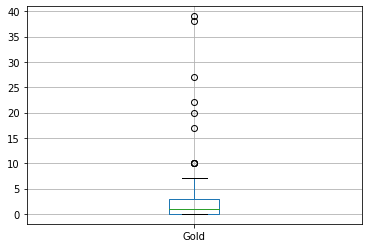

In [ ]:
#Box plots
medal_count.boxplot(column='Gold',by=None,ax=None)

(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <a list of 30 Patch objects>)

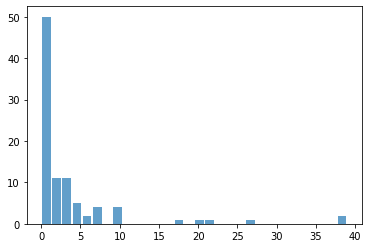

In [ ]:
#Histogram
import matplotlib.pyplot as plt
plt.hist(x=medal_count['Gold'],bins="auto",rwidth=0.85,alpha=0.7)

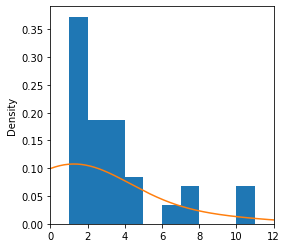

In [ ]:
#Density plots
ax = medal_count['Gold'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
medal_count['Gold'].plot.density(ax=ax)

**Exploring Binary and Categorical Data**

In [ ]:
#Mode
medal_count['Gold'].mode()


0    0
dtype: int64

Text(0, 0.5, 'Country')

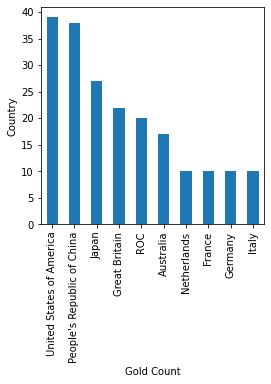

In [ ]:
ax = medal_count.iloc[:10,:].plot.bar(x="Team/NOC",y="Gold",figsize=(4, 4), legend=False)
ax.set_xlabel('Gold Count')
ax.set_ylabel('Country')

([<matplotlib.patches.Wedge at 0x7f46cdf29490>,
 [Text(-0.7155314051070093, 0.8354728052459811, 'United States of America'),
  Text(-0.9458998161617527, -0.5614922419634689, "People's Republic of China"),
  Text(0.15924203448189886, -1.0884125938512774, 'Japan'),
  Text(0.9458998161617524, -0.5614922419634694, 'Great Britain'),
  Text(1.0717821060885606, 0.247554270955622, 'ROC'),
  Text(0.6847227019531091, 0.8609034913566292, 'Australia'),
  Text(0.19865842661840455, 1.081912579432137, 'Netherlands')],
 [Text(-0.39028985733109595, 0.45571243922508053, '22.5%'),
  Text(-0.5159453542700468, -0.3062684956164376, '22.0%'),
  Text(0.0868592915355812, -0.5936795966461513, '15.6%'),
  Text(0.5159453542700467, -0.30626849561643776, '12.7%'),
  Text(0.5846084215028512, 0.13502960233943015, '11.6%'),
  Text(0.3734851101562413, 0.46958372255816133, '9.8%'),
  Text(0.10835914179185702, 0.590134134235711, '5.8%')])

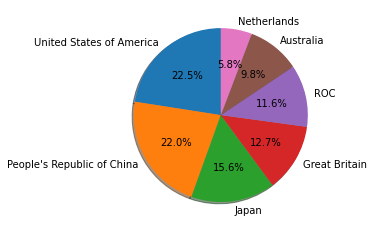

In [ ]:
#Pie chart
pie_data=medal_count.iloc[:7,:]
plt.pie(pie_data['Gold'],labels=pie_data['Team/NOC'],autopct='%1.1f%%',shadow=True,startangle=90)


**Correlation** : Measures how change in one variable will change another variable

In [ ]:
#Correlation
medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


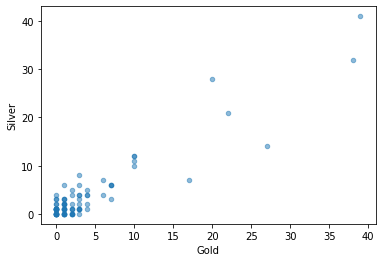

In [ ]:
#Scatter plot
medal_count.plot.scatter(x='Gold',y='Silver',alpha=0.5)

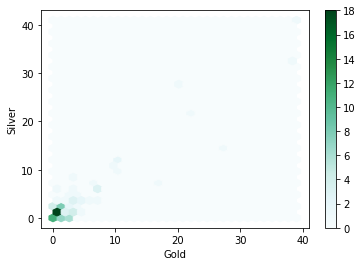

In [ ]:
medal_count.plot.hexbin(x='Gold',y='Silver',gridsize=30,sharex=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


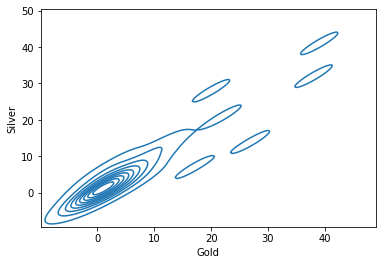

In [ ]:
import seaborn as sns
ax =sns.kdeplot(medal_count['Gold'],medal_count['Silver'])
ax

in this plot both Gold and silver highest density between below 20


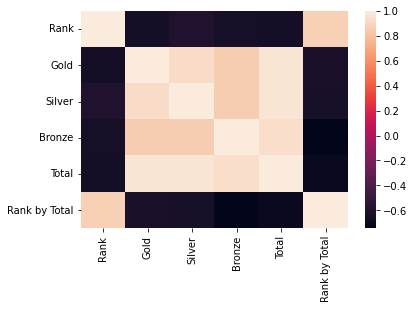

In [ ]:
#Heatmap
sns.heatmap(medal_count.corr())

Heatmaps offers another way to look at data by using colours to communicate densities.heatmaps can also be used with categorical variables as well cover in a minute

In [ ]:
#Contingency Table
crosstab = medal_count[['Silver','Gold']].pivot_table(index='Silver',columns='Gold',aggfunc=lambda x:len(x),margins=True)
crosstab.fillna(0)


Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


* Contingency tables count the number of instances of two variables within the dataset

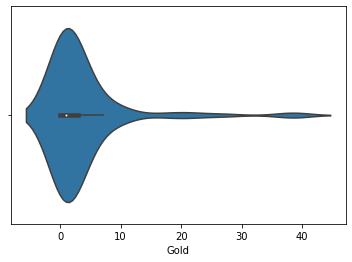

In [ ]:
#Violin plot
import seaborn as sns
sns.violinplot(x=medal_count['Gold'])

* Violin plots variations of box plots which show the distribution of values within the boxes.
This helps to see where the density of values biases